In [11]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv('datasets/Train.csv')
print(data_train.head())
data_train.info()
data_train.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


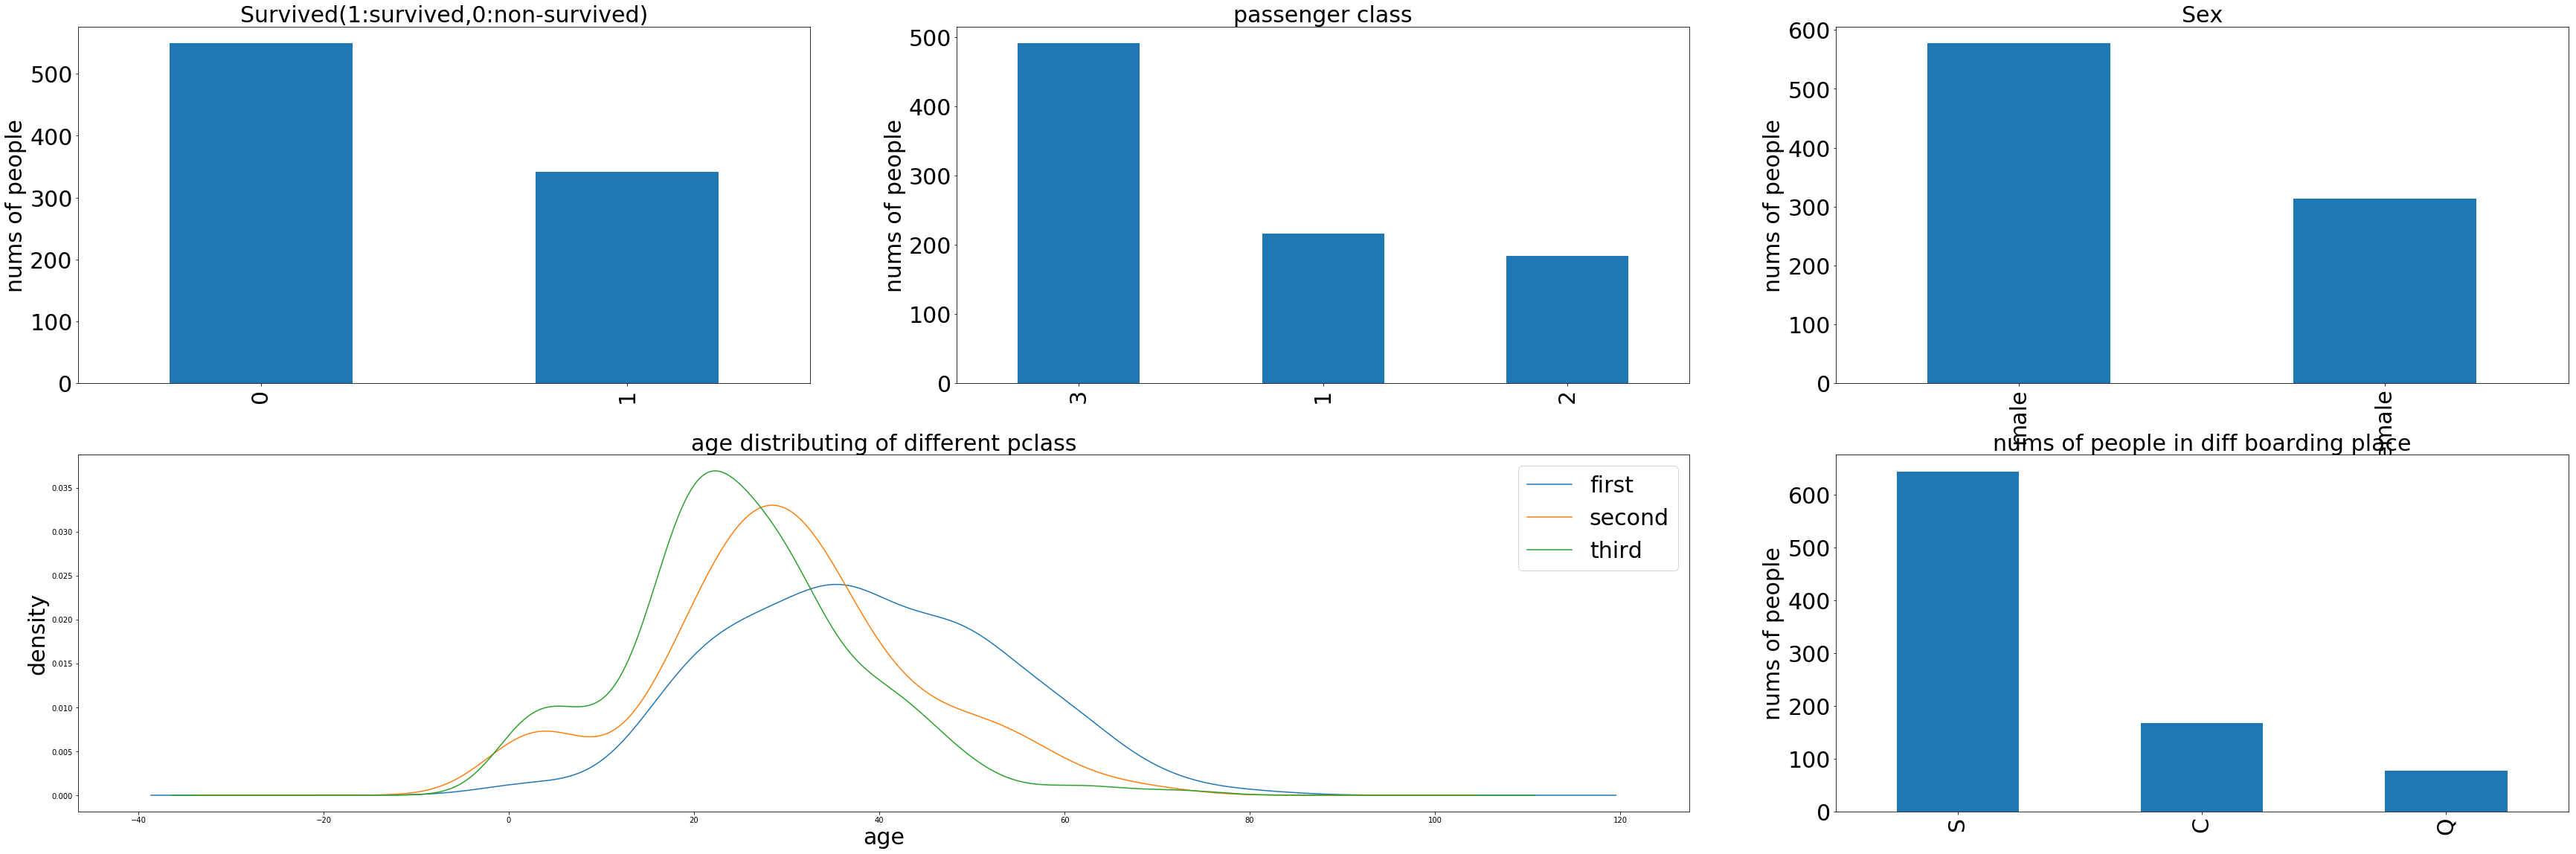

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,30))
fig.set(alpha=0.2)

plt.subplot2grid((3,3),(0,0))#每一张大图理分裂几个小图
data_train.Survived.value_counts().plot(kind='bar',fontsize=30)
plt.title('Survived(1:survived,0:non-survived)',fontsize=30)
plt.ylabel('nums of people',fontsize=30)

plt.subplot2grid((3,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar',fontsize=30)
plt.title('passenger class',fontsize=30)
plt.ylabel('nums of people',fontsize=30)

plt.subplot2grid((3,3),(0,2))
data_train.Sex.value_counts().plot(kind='bar',fontsize=30)
plt.title('Sex',fontsize=30)
plt.ylabel('nums of people',fontsize=30)

plt.subplot2grid((3,3),(0,2))
data_train.Sex.value_counts().plot(kind='bar',fontsize=30)
plt.title('Sex',fontsize=30)
plt.ylabel('nums of people',fontsize=30)

plt.subplot2grid((3,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.xlabel('age',fontsize=30)
plt.ylabel('density',fontsize=30)
plt.title('age distributing of different pclass',fontsize=30)
plt.legend(('first','second','third'),loc='best',fontsize=30)

plt.subplot2grid((3,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar',fontsize=30)
plt.title('nums of people in diff boarding place',fontsize=30)
plt.ylabel('nums of people',fontsize=30)

plt.show()

<Figure size 432x288 with 0 Axes>

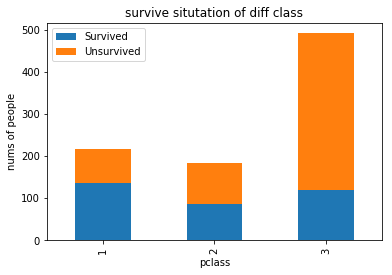

In [64]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived==0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived==1].value_counts()
df = pd.DataFrame({'Survived':Survived_1,'Unsurvived':Survived_0})
df.plot(kind='bar',stacked=True)
plt.title('survive situtation of diff class')
plt.xlabel('pclass')
plt.ylabel('nums of people')
plt.show()

<Figure size 432x288 with 0 Axes>

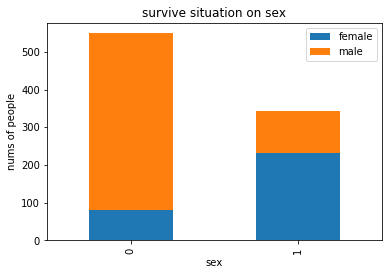

In [65]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex=='male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex=='female'].value_counts()
df = pd.DataFrame({'male':Survived_m,'female':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title('survive situation on sex')
plt.xlabel('sex')
plt.ylabel('nums of people')
plt.show()

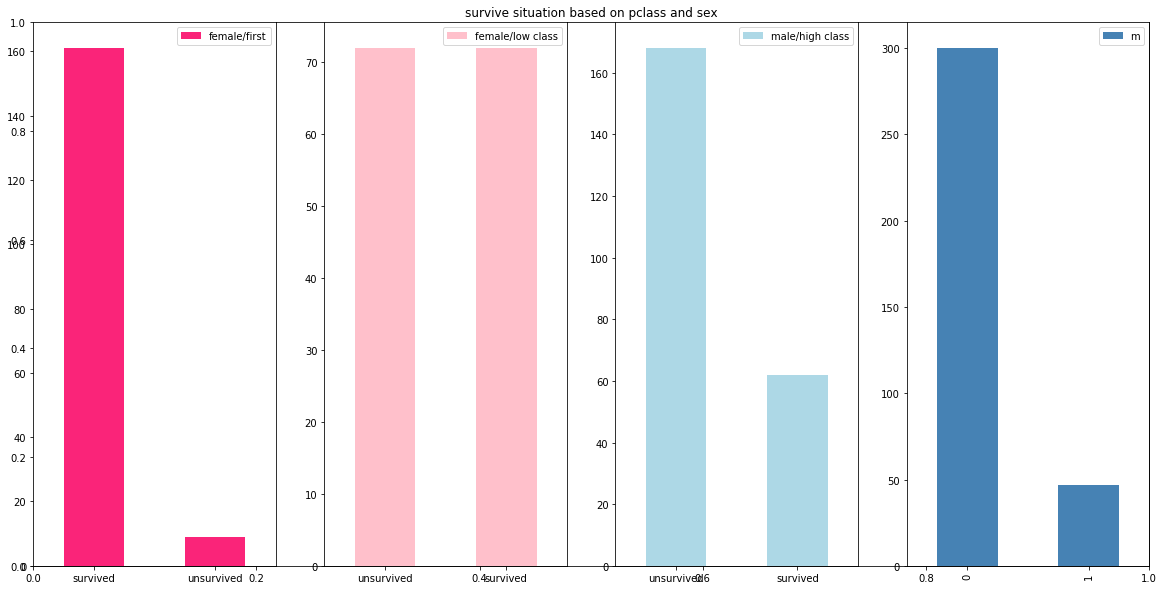

In [81]:
fig = plt.figure(figsize=(20,10))
fig.set(alpha=0.5)
plt.title('survive situation based on pclass and sex')

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(["survived", "unsurvived"], rotation=0)
ax1.legend([u"female/first"], loc='best')

ax2=fig.add_subplot(142)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass==3].value_counts().plot(kind='bar',label='female low class',color='pink')
ax2.set_xticklabels(['unsurvived','survived'],rotation=0)
plt.legend(['female/low class'],loc='best')

ax3= fig.add_subplot(143)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=3].value_counts().plot(kind='bar',label='male high class',color='lightblue')
ax3.set_xticklabels(['unsurvived','survived'],rotation=0)
plt.legend(['male/high class'],loc='best')

ax4 = fig.add_subplot(144)
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==3].value_counts().plot(kind='bar',label='male low class',color='steelblue')
ax3.set_xticklabels(['unsurvived','survived'])
plt.legend('male/low class')
plt.show()

<Figure size 432x288 with 0 Axes>

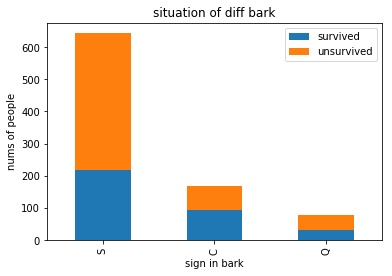

In [83]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'survived':Survived_1, 'unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"situation of diff bark")
plt.xlabel(u"sign in bark") 
plt.ylabel(u"nums of people") 

plt.show()

In [84]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

# g = data_train.groupby(['SibSp','Survived'])
# df = pd.DataFrame(g.count()['PassengerId'])
# print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [85]:
# cabin仅204个值，现查看其分布
data_train.Cabin.value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
F33                3
E101               3
F2                 3
D                  3
C83                2
C2                 2
B58 B60            2
B22                2
C123               2
B57 B59 B63 B66    2
B35                2
B18                2
E67                2
C65                2
E33                2
C125               2
C93                2
D17                2
B20                2
F4                 2
E121               2
D33                2
E24                2
B49                2
C124               2
E25                2
                  ..
E34                1
E50                1
B42                1
D56                1
D37                1
E12                1
A6                 1
E68                1
A24                1
B82 B84            1
C110               1
C7                 1
D11                1
C50                1
D30                1
C95                1
C82          

<Figure size 432x288 with 0 Axes>

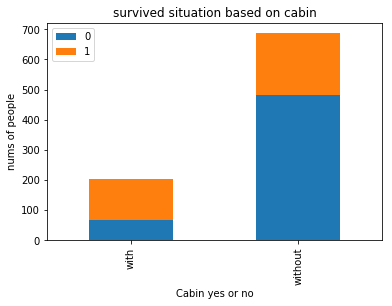

In [87]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'with':Survived_cabin, 'without':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"survived situation based on cabin")
plt.xlabel(u"Cabin yes or no") 
plt.ylabel(u"nums of people")
plt.show()

In [92]:
# 特征工程：处理Cabin和Age
# Cabin缺失过多，根据上一个cell介绍，可将有无Cabin处理为yes或no两种类型
# Age缺失处理：
## 若缺失样本占比过高，则直接舍去，否则作为特征加入的话可能反而变成噪声
## 缺失样本数适中且为为连续特征属性，则吧NaN作为新特征加入到类别中
## 确实样本数始终且为连续值特征属性，考虑一个给定Step将其离散化，然后NaN作为一个type加入
## 缺失值较少，可以试着根据已有值拟合一下数据，补充
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    # 把已有数值型特征取出来丢进Random Forest Regressor
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # y即目标年龄
    y = known_age[:,0]
    
    # X即特征属性值
    X = known_age[:,1:]
    
    # fit到RandomForestRegressor中
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(X,y)
    
    predictedAges = rfr.predict(unknown_age[:,1:])
    df.loc[(df.Age.isnull()),'Age'] = predictedAges
    
    return df,rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin'] = 'yes'
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'no'
    return df

data_train,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

data_train.info()

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [100]:
# 特征因子化：one-hot表示，例如原本cabin有yes和no，改为cabin_yes和cabin_bo两个属性
# dummies:仿制品
dummies_Cabin = pd.get_dummies(data_train['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'],prefix='Pclass')
df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
print(df.head())


   PassengerId  Survived   Age  SibSp  Parch     Fare  Cabin_no  Cabin_yes  \
0            1         0  22.0      1      0   7.2500         1          0   
1            2         1  38.0      1      0  71.2833         0          1   
2            3         1  26.0      0      0   7.9250         1          0   
3            4         1  35.0      1      0  53.1000         0          1   
4            5         0  35.0      0      0   8.0500         1          0   

   Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male  Pclass_1  \
0           0           0           1           0         1         0   
1           1           0           0           1         0         1   
2           0           0           1           1         0         0   
3           0           0           1           1         0         1   
4           0           0           1           0         1         0   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         

In [104]:
# scale:规范化
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'],age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'],fare_scale_param)
print(df)

     PassengerId  Survived        Age  SibSp  Parch      Fare  Cabin_no  \
0              1         0  22.000000      1      0 -0.502445         1   
1              2         1  38.000000      1      0  0.786845         0   
2              3         1  26.000000      0      0 -0.488854         1   
3              4         1  35.000000      1      0  0.420730         0   
4              5         0  35.000000      0      0 -0.486337         1   
5              6         0  23.828953      0      0 -0.478116         1   
6              7         0  54.000000      0      0  0.395814         0   
7              8         0   2.000000      3      1 -0.224083         1   
8              9         1  27.000000      0      2 -0.424256         1   
9             10         1  14.000000      1      0 -0.042956         1   
10            11         1   4.000000      1      1 -0.312172         0   
11            12         1  58.000000      0      0 -0.113846         0   
12            13         

D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a sing

In [110]:
# 逻辑回归建模
from sklearn import linear_model

# 用正则去除我们需要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即survival结果
y = train_np[:,0]

# X 即特征属性值
X = train_np[:,1:]

#fit到RandomForestRegressor中
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0,penalty='l1',tol=1e-6)
clf.fit(X,y)

clf

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [111]:
# 对测试集作同样的预处理
data_test = pd.read_csv('datasets/test.csv')
data_test.loc[(data_test.Fare.isnull()),'Fare'] = 0
# 对test_data做和train_data一致的特征变换
tmp_df = data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),'Age']=predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: Deprecatio

,PassengerId,Age,SibSp,Parch,Fare,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307535,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256230,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394665,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261683,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641161,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248326,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.033996,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337578,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944743,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717056,-0.204154


In [113]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(),'Survived':predictions.astype(np.int32)})
result.to_csv('output/result.csv',index=False)

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
# 关联model系数和feature
pd.DataFrame({'columns':list(train_df.columns)[1:],'coef':list(clf.coef_.T)})

,coef,columns
0,[-0.3442286500747029],SibSp
1,[-0.10493131613936328],Parch
2,[0.0],Cabin_no
3,[0.9021419760972097],Cabin_yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.4172621115947292],Embarked_S
7,[1.9565760457684245],Sex_female
8,[-0.6774195711055728],Sex_male
9,[0.34114348187632504],Pclass_1


In [116]:
# 交叉验证
from sklearn.model_selection import cross_val_score,train_test_split

# 简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print(cross_val_score(clf,X,y,cv=5))

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [122]:
# split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("datasets/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


D:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


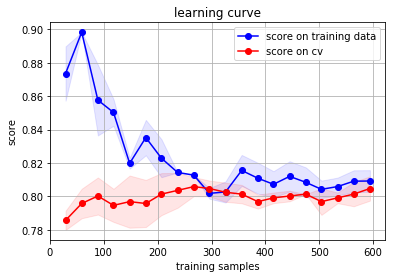

(0.8065696844854024, 0.018258876711338634)

In [128]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.learning_curve import learning_curve  修改以fix learning_curve DeprecationWarning
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("training samples")
        plt.ylabel("score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="score on training data")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="score on cv")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, "learning curve", X, y)

In [ ]:
# 模型融合
from sklearn.ensemble import BaggingRegressor
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

y = train_np[:,0]

X = train_np[:,1:]

clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
bagging_clf = BaggingRegressor(clf,n_estimators=20,max_samples=0.8,max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=-1)
bagging_clf.fit(X,y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values,'Survived':predictions.astype(np.int32)})
result.to_csv("output/logistic_regression_bagging_predictions.csv", index=False)